In [1]:
import pandas as pd
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Function to process, clean, and pivot each dataframe
def process_and_pivot(df, prefix):
    # Fill missing numeric values with the mean and categorical values with "Not Available"
    df.fillna(df.mean(numeric_only=True), inplace=True)
    df.fillna("Not Available", inplace=True)
    
    # Filter the relevant columns: 'Location', 'Period', and 'Value'
    df_filtered = df[['Location', 'Period', 'Value']]

    # Pivot the DataFrame so that 'Period' (Year) becomes the columns
    df_pivoted = df_filtered.pivot(index='Location', columns='Period', values='Value')

    # Rename the columns to have the specified prefix
    df_pivoted = df_pivoted.rename(columns=lambda x: f"{prefix}_{x}")

    return df_pivoted.reset_index()

# Load the datasets
advertisingBan = pd.read_csv('../data/advertising_ban_internet.csv')
affordability = pd.read_csv('../data/affordability.csv')
gdp2000Cigs = pd.read_csv('../data/gdp_for_2000_cigs.csv')
healthWarningPhoto = pd.read_csv('../data/health_warning_photo.csv')
requiredHealthWarnings = pd.read_csv('../data/required_health_warning.csv')

# Process and pivot each dataframe
advertisingBan_pivoted = process_and_pivot(advertisingBan, 'advertisingBan')
affordability_pivoted = process_and_pivot(affordability, 'affordability')
gdp2000Cigs_pivoted = process_and_pivot(gdp2000Cigs, 'gdp2000Cigs')
healthWarningPhoto_pivoted = process_and_pivot(healthWarningPhoto, 'healthWarningPhoto')
requiredHealthWarnings_pivoted = process_and_pivot(requiredHealthWarnings, 'requiredHealthWarnings')

# Merge the pivoted dataframes on 'Location'
combined_df = advertisingBan_pivoted.merge(affordability_pivoted, on='Location', how='outer')
combined_df = combined_df.merge(gdp2000Cigs_pivoted, on='Location', how='outer')
combined_df = combined_df.merge(healthWarningPhoto_pivoted, on='Location', how='outer')
combined_df = combined_df.merge(requiredHealthWarnings_pivoted, on='Location', how='outer')

# Drop 'Location' for clustering and handle missing values again
data_for_clustering = combined_df.drop(columns=['Location'])

# Use a pipeline to handle missing values, encode categorical data, and scale the data
numeric_features = data_for_clustering.select_dtypes(include=['float64', 'int64']).columns
categorical_features = data_for_clustering.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Prepare the final data for clustering
clustering_data = preprocessor.fit_transform(data_for_clustering)

# Now `clustering_data` is ready for clustering algorithms
clustering_data = pd.DataFrame(clustering_data)
clustering_data.to_csv('../processed_data/processed_data2.csv', index=False)

C:\Users\albin\AppData\Local\Temp\ipykernel_26520\1640972367.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Not Available' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna("Not Available", inplace=True)
C:\Users\albin\AppData\Local\Temp\ipykernel_26520\1640972367.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Not Available' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna("Not Available", inplace=True)
C:\Users\albin\AppData\Local\Temp\ipykernel_26520\1640972367.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Not Available' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna

In [3]:
import pandas as pd

# Function to process and pivot each dataframe
def process_and_pivot(df, prefix):
    df_filtered = df[['Location', 'Period', 'Value']]
    df.fillna(df.mean(numeric_only=True), inplace=True)
    df_pivoted = df_filtered.pivot(index='Location', columns='Period', values='Value')

    df_pivoted = df_pivoted.rename(columns=lambda x: f"{prefix}_{x}")

    return df_pivoted.reset_index()

# Load the datasets
advertisingBan = pd.read_csv('../data/advertising_ban_internet.csv')
affordability = pd.read_csv('../data/affordability.csv')
#ageStandardized = pd.read_csv('../data/age_stand.csv')
gdp2000Cigs = pd.read_csv('../data/gdp_for_2000_cigs.csv')
healthWarningPhoto = pd.read_csv('../data/health_warning_photo.csv')
requiredHealthWarnings = pd.read_csv('../data/required_health_warning.csv')

# Process and pivot each dataframe
advertisingBan_pivoted = process_and_pivot(advertisingBan, 'advertisingBan')
affordability_pivoted = process_and_pivot(affordability, 'affordability')
#ageStandardized_pivoted = process_and_pivot(ageStandardized, 'ageStandardized')
gdp2000Cigs_pivoted = process_and_pivot(gdp2000Cigs, 'gdp2000Cigs')
healthWarningPhoto_pivoted = process_and_pivot(healthWarningPhoto, 'healthWarningPhoto')
requiredHealthWarnings_pivoted = process_and_pivot(requiredHealthWarnings, 'requiredHealthWarnings')

# Merge the pivoted dataframes on 'Location'
combined_df = advertisingBan_pivoted.merge(affordability_pivoted, on='Location', how='outer')
#combined_df = combined_df.merge(ageStandardized_pivoted, on='Location', how='outer')
combined_df = combined_df.merge(gdp2000Cigs_pivoted, on='Location', how='outer')
combined_df = combined_df.merge(healthWarningPhoto_pivoted, on='Location', how='outer')
combined_df = combined_df.merge(requiredHealthWarnings_pivoted, on='Location', how='outer')

# Inspect the combined dataframe
combined_df.to_csv('../processed_data/processed_data.csv', index=False)
combined_df

Period,Location,advertisingBan_2007,advertisingBan_2008,advertisingBan_2010,advertisingBan_2012,advertisingBan_2014,advertisingBan_2016,advertisingBan_2018,advertisingBan_2020,advertisingBan_2022,...,healthWarningPhoto_2022,requiredHealthWarnings_2007,requiredHealthWarnings_2008,requiredHealthWarnings_2010,requiredHealthWarnings_2012,requiredHealthWarnings_2014,requiredHealthWarnings_2016,requiredHealthWarnings_2018,requiredHealthWarnings_2020,requiredHealthWarnings_2022
0,Afghanistan,No,No,No,No,No,Yes,Yes,Yes,Yes,...,No,No,No,No,No,No,Yes,Yes,Yes,Yes
1,Albania,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
2,Algeria,No,No,No,No,No,No,Yes,Yes,Yes,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
3,Andorra,No,No,No,No,No,No,No,No,No,...,Not applicable,No,No,No,No,No,No,No,No,No
4,Angola,No,No,No,No,No,No,No,No,No,...,Not applicable,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Viet Nam,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
191,Yemen,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
192,Zambia,No,No,No,No,No,No,No,No,No,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
193,Zimbabwe,No,No,No,No,No,No,No,No,No,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes


C:\Users\albin\AppData\Local\Temp\ipykernel_26520\174234112.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Not Available' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna("Not Available", inplace=True)
C:\Users\albin\AppData\Local\Temp\ipykernel_26520\174234112.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Not Available' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna("Not Available", inplace=True)
C:\Users\albin\AppData\Local\Temp\ipykernel_26520\174234112.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Not Available' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna("N

silhouette_score: 0.2597191588001664
davies_bouldin_score: 1.3942770679942253


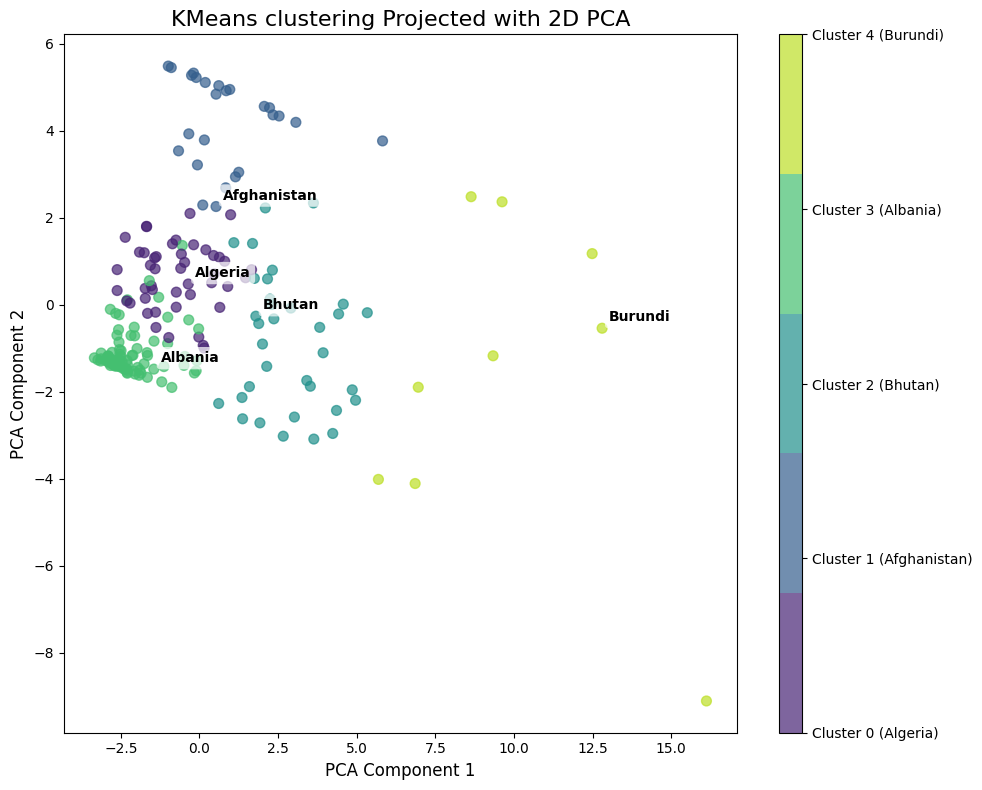

In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from utils.functions import plot_clusters_2d
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from utils.functions import evaluate_clusters


# Function to process and pivot each dataframe
def process_and_pivot(df, prefix):
    df.fillna(df.mean(numeric_only=True), inplace=True)
    df.fillna("Not Available", inplace=True)
    
    df_filtered = df[['Location', 'Period', 'Value']]
    df_pivoted = df_filtered.pivot(index='Location', columns='Period', values='Value')
    df_pivoted = df_pivoted.rename(columns=lambda x: f"{prefix}_{x}")
    
    return df_pivoted.reset_index()

# Load the datasets
advertisingBan = pd.read_csv('../data/advertising_ban_internet.csv')
affordability = pd.read_csv('../data/affordability.csv')
gdp2000Cigs = pd.read_csv('../data/gdp_for_2000_cigs.csv')
healthWarningPhoto = pd.read_csv('../data/health_warning_photo.csv')
requiredHealthWarnings = pd.read_csv('../data/required_health_warning.csv')

# Process and pivot each dataframe
advertisingBan_pivoted = process_and_pivot(advertisingBan, 'advertisingBan')
affordability_pivoted = process_and_pivot(affordability, 'affordability')
gdp2000Cigs_pivoted = process_and_pivot(gdp2000Cigs, 'gdp2000Cigs')
healthWarningPhoto_pivoted = process_and_pivot(healthWarningPhoto, 'healthWarningPhoto')
requiredHealthWarnings_pivoted = process_and_pivot(requiredHealthWarnings, 'requiredHealthWarnings')

# Merge the pivoted dataframes on 'Location'
combined_df = advertisingBan_pivoted.merge(affordability_pivoted, on='Location', how='outer')
combined_df = combined_df.merge(gdp2000Cigs_pivoted, on='Location', how='outer')
combined_df = combined_df.merge(healthWarningPhoto_pivoted, on='Location', how='outer')
combined_df = combined_df.merge(requiredHealthWarnings_pivoted, on='Location', how='outer')

# Drop 'Location' for clustering
data_for_clustering = combined_df.drop(columns=['Location'])

# Preprocessing pipeline: imputing, encoding, and scaling
numeric_features = data_for_clustering.select_dtypes(include=['float64', 'int64']).columns
categorical_features = data_for_clustering.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Prepare the final data for clustering
clustering_data = preprocessor.fit_transform(data_for_clustering)

# Apply K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(clustering_data)

mask = kmeans.labels_ != -1
data = clustering_data[mask]
labels = kmeans.labels_[mask]

evaluate_clusters(silhouette_score, data, labels)
evaluate_clusters(davies_bouldin_score, data, labels)

plot_clusters_2d(kmeans, clustering_data, combined_df)


silhouette_score: 0.8627241093837335
davies_bouldin_score: 0.18553837509914262


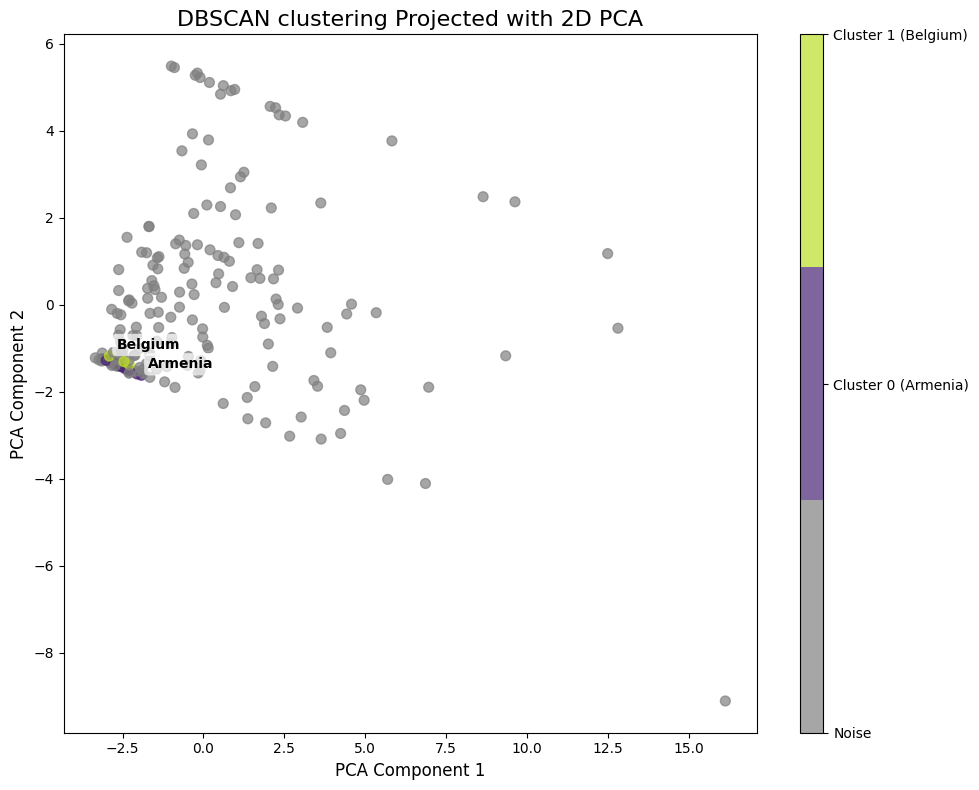

In [5]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(clustering_data)

mask = dbscan.labels_ != -1
data = clustering_data[mask]
labels = dbscan.labels_[mask]

import numpy as np

evaluate_clusters(silhouette_score, data, labels)
evaluate_clusters(davies_bouldin_score, data, labels)
plot_clusters_2d(dbscan, clustering_data, combined_df, noise=True)


In [6]:
a = combined_df.groupby('Cluster')['Location'].apply(list)
print(len(a[0]))
print(len(a[1]))
print(len(a[2]))
print(len(a[3]))

15
6


KeyError: 2

In [7]:
print(a[0])
print(a[1])
print(a[2])
print(a[3])

['Armenia', 'Austria', 'Belarus', 'Bulgaria', 'Czechia', 'Finland', 'Germany', 'Greece', 'Italy', 'Lithuania', 'Netherlands (Kingdom of the)', 'Poland', 'Portugal', 'Republic of Korea', 'Slovakia']
['Belgium', 'Brazil', 'Chile', 'New Zealand', 'Romania', 'Singapore', 'Thailand', 'United Kingdom of Great Britain and Northern Ireland']
['Bahamas', 'Belize', 'Dominican Republic', 'Guatemala', 'Marshall Islands', 'Morocco']
['Andorra', 'Bosnia and Herzegovina', 'Dominica', 'Equatorial Guinea', 'Grenada', 'Saint Kitts and Nevis', 'Saint Vincent and the Grenadines']
